# This is heart Disease prediction project
we are going to predict based on the data whether on the data whether someone have the heart attack or not

* 1- Problem Definition
* 2- Data
* 3- Evaluate
* 4- Feature
* 5- Modelling
* 6- Experimentation 

# 1-Problem Definition
> Bases on the given data we need to predict if a patient has heart disease or not


# 2-Data
> we have the data and have loaded it already

# 3-Evaluate
> In initial stages we need to make sure, if our model gives us the accuracy of 90%

# 4-Features
> What features are important, what features column means what

* age: Age of the patient (in years)
* sex: Sex of the patient (1 = male, 0 = female)
* cp: Chest pain type (1-4)
* trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
* chol: Serum cholesterol in mg/dl
* fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: Resting electrocardiographic results (0-2)
* thalach: Maximum heart rate achieved
* exang: Exercise-induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope
* ca
* thal 
* target 1=yes 0=No

# Tools Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# mport Evaluation Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# Exploring the Data Initial Stage

* 1- What problem i am going to solve
* 2- What kind of data I have
* 3- Does this data have missing values
* 4- Are there any outliers, sporious vectors
* 5- can we add or remove some of the features

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

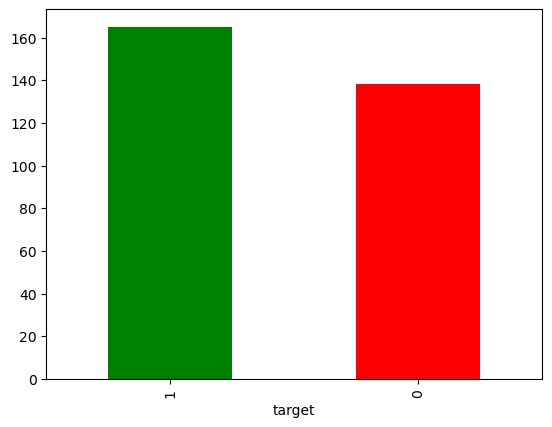

In [6]:
df['target'].value_counts().plot(kind='bar',color=['green','red']);

In [7]:
df.isna().sum() # Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
len(df)

303

In [11]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
72/96

0.75

In [13]:
93/207

0.4492753623188406

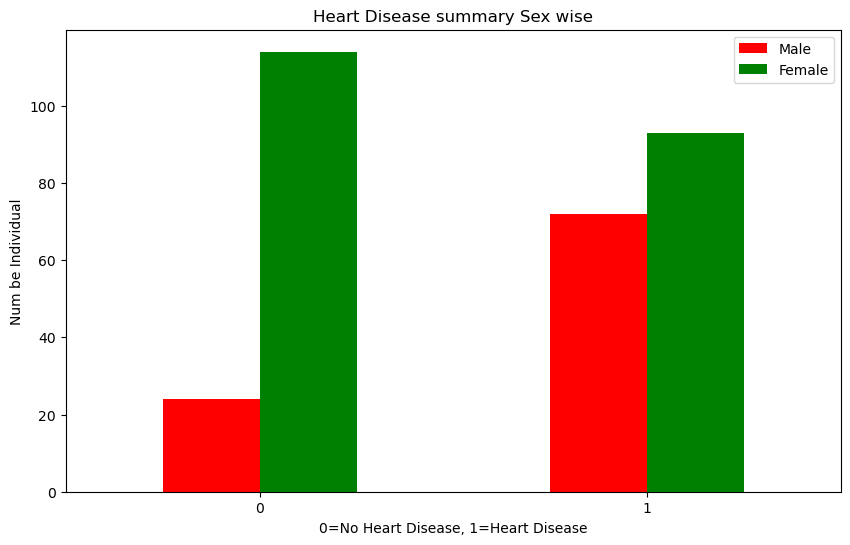

In [14]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',
                                                   figsize=(10,6),
                                                   color=['red','green'])
plt.title('Heart Disease summary Sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Male','Female'])
plt.xticks(rotation=0);

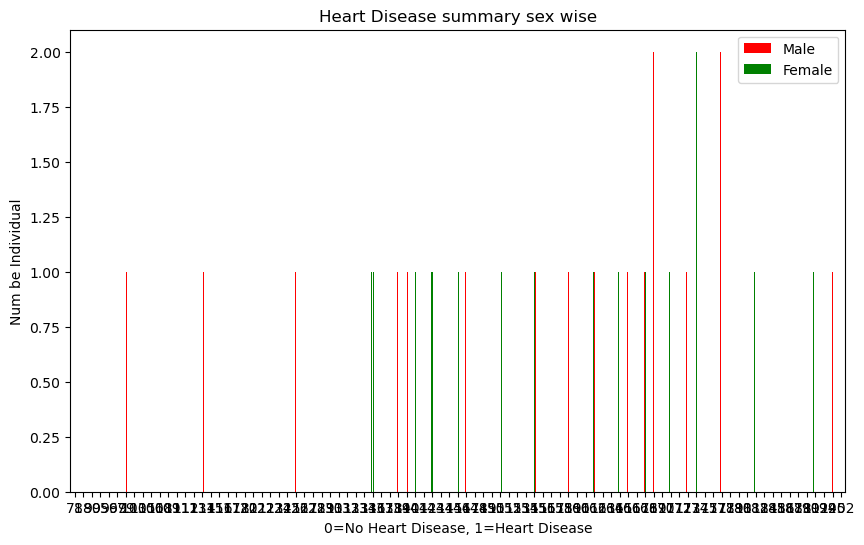

In [15]:
pd.crosstab(df['thalach'],df['age']).plot(kind='bar',
                                                   figsize=(10,6),
                                                   color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Male','Female'])
plt.xticks(rotation=0);

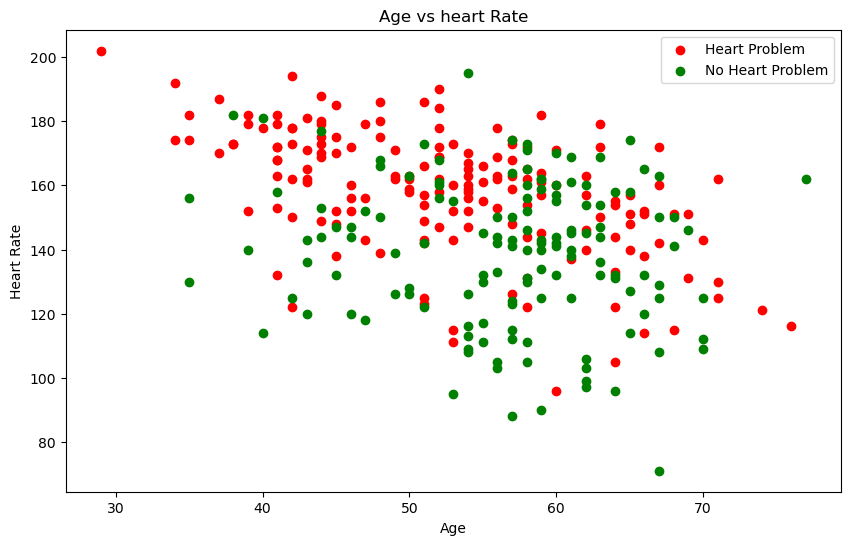

In [16]:
# Finding Pattren in Data using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green')
plt.title('Age vs heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Heart Problem','No Heart Problem']);

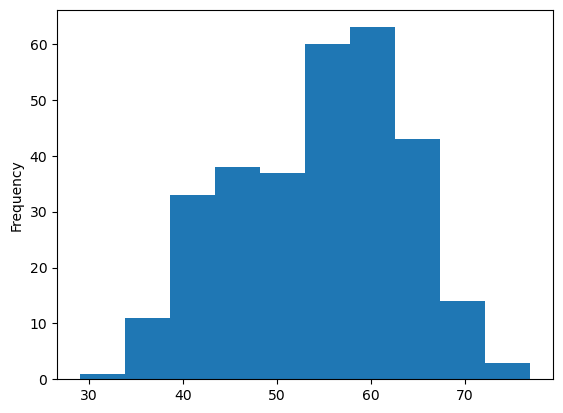

In [17]:
# Create Histogram to see age Distribution 
# Gussian Distributions  perfect
# Skewd toward high age value 
df.age.plot.hist();

In [18]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

* cp: chest pain type
* -- Value 0: typical angina : chest pain due to decrease in blodd pressure
* -- Value 1: atypical angina : Chest Pain not related to Heart Problem
* -- Value 2: non-anginal pain : No Heart Related
* -- Value 3: asymptomatic : Chest Pain not showing Heart Problem

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


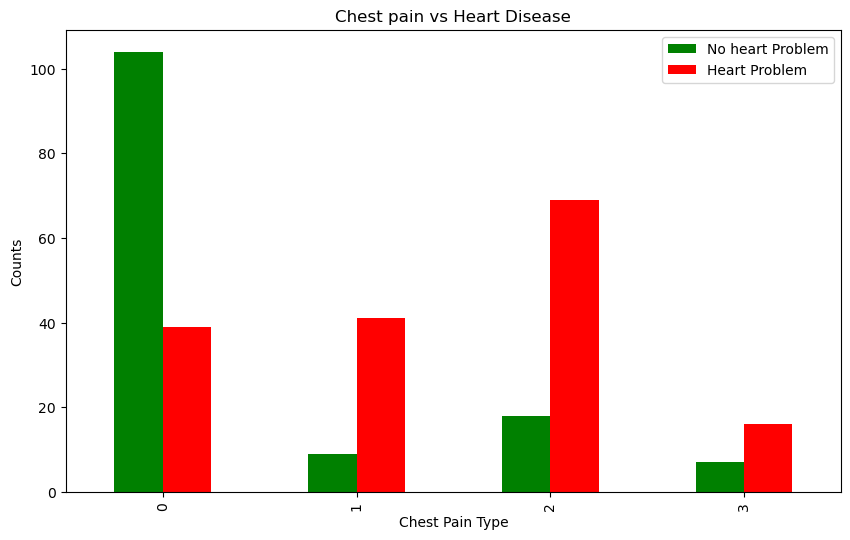

In [20]:
# Make the Bar Chart of Chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['green','red'])
# Make some description of the chart
plt.title('Chest pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No heart Problem','Heart Problem']);

# Correlation Matrix

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


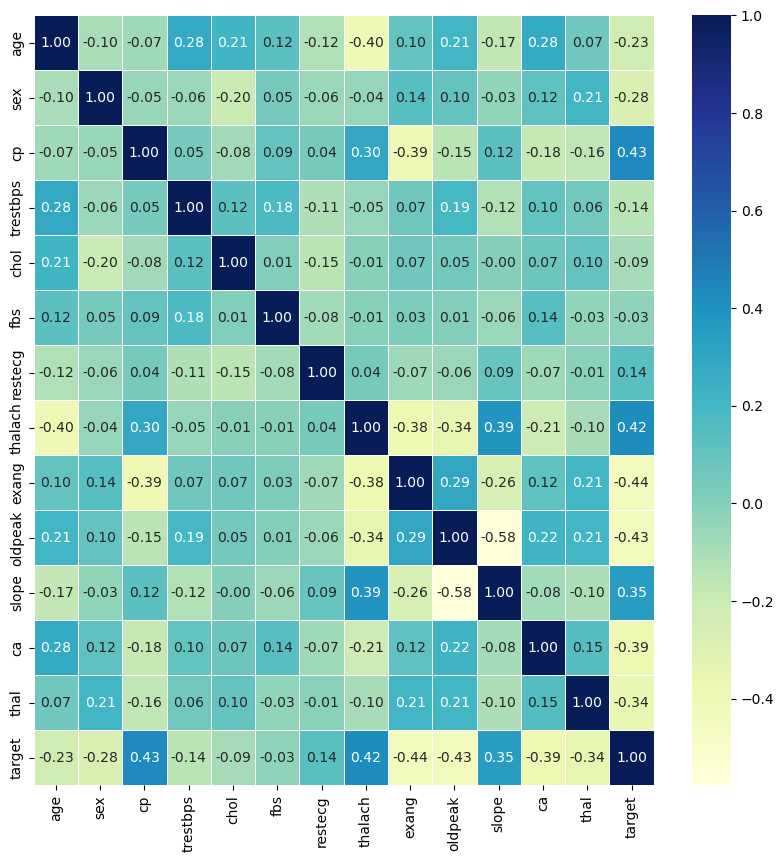

In [23]:
# Lets Draw Correlation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu');

# 3 Modelling

In [24]:
# split into test and train data

X = df.drop('target',axis=1)
y =df['target']

In [25]:
# Using Random seed, so that others could produce the same result
np.random.seed(7)
# split into test and train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
len(X)

303

In [27]:
len(X_train)

242

# The model we are going to use
1. K-Nearset Neighbors Classifier
2. Random Forest Classifier
3. Logostic Regression

In [28]:
# Putting the models into a Dictionary 
models = {"KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(),
         "LOgistic Regression":LogisticRegression()}

# Create Function to evaluate the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    
    # make a Dictionary to score the model
    model_score = {}
    
    # looping through
    for name,model in models.items():
        model.fit(X_train,y_train)
        
        # Evaluate the model and append it score
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\mimra\Desktop\AI-Course\cardio_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'LOgistic Regression': 0.7540983606557377}

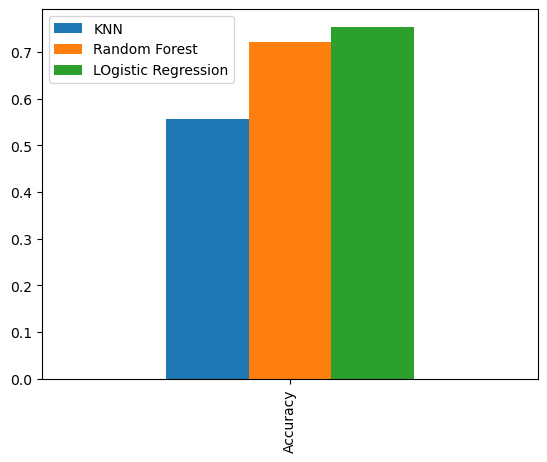

In [30]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

# Improving and Tuning the Model 
 Universal Methods used for all Classification problem
 * Hyperparameter Tuning
 * features Improving  
# Advanced Level
 * Confusion_Matrix
 * Cross_validation
 * precision
 * Recall
 * f1
 * Classification Report
 * ROC Curve

 * Hyperparameter Tuning
 * features Improving

In [31]:

train_score = []
test_score = []
# Create range to be best for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
# Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for ith value
    KNN.fit(X_train,y_train)
    # Update the traning Score
    train_score.append(KNN.score(X_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(X_test,y_test))
    

In [32]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [33]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

# Plot the Accuracy

Max KNN Score:70.49%


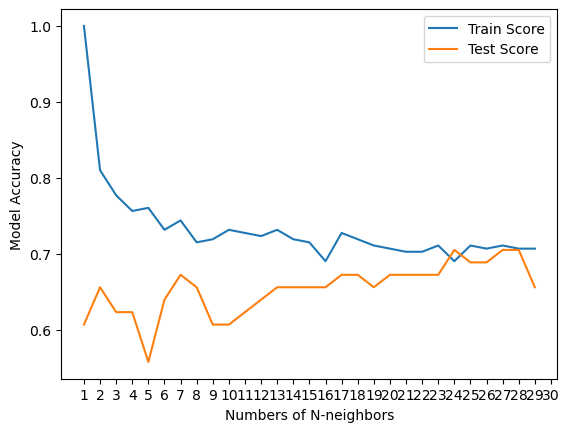

In [34]:
plt.plot(nneighbors,train_score, label="Train Score")
plt.plot(nneighbors,test_score, label="Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel('Numbers of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print(f"Max KNN Score:{max(test_score)*100:0.2f}%");
# Last nail in the coffin in the KNN we move to another model to see whic one give better accuracy then this

# Hyperparameter tuning using Randomize Search CV (RSCV)
* LogisticRegression()
* RandomForestClassifier()

In [35]:
LR_hp = {
    "C" : np.logspace(-4,4,20),             # Parameters 
    "solver" : ["liblinear"]                # Parameters 
}
RFC_hp = {
    "n_estimators":np.arange(10,1600,100),              # Parameters 
    "max_depth":[None,3,5,6,10],                        # Parameters 
    "min_samples_split":np.arange(2,20,2),              # Parameters 
    "min_samples_leaf" :np.arange(1,20,2),              # Parameters 
}

In [36]:
# Tune Logistic Regression
np.random.seed(7)
# Lets Use RSCV to tune HP

lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search model for LR
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
lr.score(X_test,y_test)

0.7540983606557377

In [38]:
lr.best_params_

{'solver': 'liblinear', 'C': np.float64(0.615848211066026)}

In [39]:
# Tune Random Forest Classifier
np.random.seed(7)
# Lets Use RSCV to tune HP

rfc= RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search model for Rfc
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [40]:
rfc.score(X_test,y_test)

0.7049180327868853

In [41]:
rfc.best_params_

{'n_estimators': np.int64(710),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(19),
 'max_depth': 6}

* 1. By hand hyperparameter Tunning # Done it, been there, seen it all
* 2. Randomized Search CV # Done it, been there, seen it all
* 3. gridSearch CV  # let's try this one

In [42]:
# Hyperparameter tunning using GridSearch CV

In [43]:
# Tune Logistic Regression
np.random.seed(7)
# Lets Use GSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)
# Fit the random HP search model for LR
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
lr_gs.score(X_test,y_test)

0.7540983606557377

In [45]:
lr_gs.best_params_

{'C': np.float64(0.615848211066026), 'solver': 'liblinear'}

In [46]:
# Tune Random Forest Classifier using GSCV
np.random.seed(7)
# Lets Use GSCV to tune HP
RFC_hp = {
    "n_estimators":np.arange(1,101,50),              # Parameters 
    "max_depth":[None,3,50],                        # Parameters 
    "min_samples_split":np.arange(2,8,2),              # Parameters 
    "min_samples_leaf" :np.arange(1,7,2),  

}

rfc_gs = GridSearchCV(RandomForestClassifier(),
                      param_grid=RFC_hp,
                      cv=5,
                      verbose=True,
                      n_jobs=-1)
# Fit the random HP search model for RFC
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [47]:
rfc_gs.score(X_test,y_test)

0.7377049180327869

In [48]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': np.int64(3),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(51)}

* 'KNN': 0.5573770491803278   after improving = 7049
* 'Random Forest': 0.7213114754098361  after improving = 0.7377049180327869
* 'LOgistic Regression': 0.7540983606557377 after improving = 0.7540983606557377

# Improving and Tuning the Model 
 Universal Methods used for all Classification problem
 * Hyperparameter Tuning  # Done
 * features Improving  # Not touched yet
# Advanced Level
 * ROC Curve
 * Confusion_Matrix
 * Cross_validation
 * precision
 * Recall
 * f1
 * Classification Report
 * ROC Curve

# Confusion_Matrix 
# Cross_validation

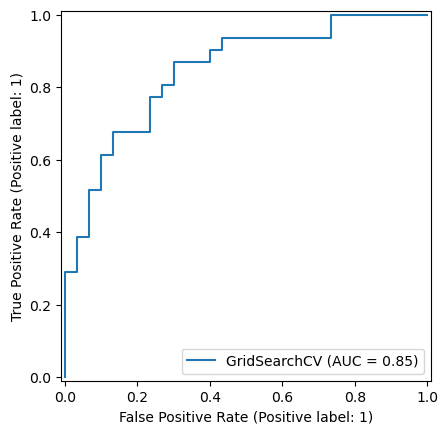

In [49]:
# Plotting the area under the curve
y_preds = lr_gs.predict(X_test)
RocCurveDisplay.from_estimator(lr_gs,X_test,y_test)

In [50]:
# conusion Matrix
print(confusion_matrix(y_test,y_preds))

[[18 12]
 [ 3 28]]


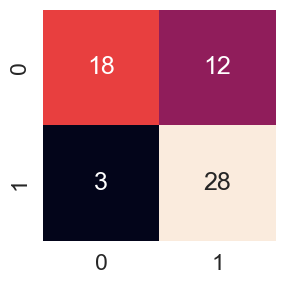

In [51]:
sns.set(font_scale=1.5)

def plot_confusion(y_test,y_preds):
    "This is plot the confusion matrix"

    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)

plot_confusion(y_test,y_preds)
    

# Lets plot the Classification report

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [53]:
lr_gs.best_params_
lr = LogisticRegression(C=0.615848211066026,
                       solver="liblinear")

In [54]:
# Cross Validated Accuracy

cv_accuracy = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

np.float64(0.8284506191482934)

In [55]:
# Cross Validated precision

cv_precision = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8108267922553637)

In [56]:
# Cross Validated recall

cv_recall = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.89648033126294)

In [57]:
# Cross Validated f1_Score

cv_f1 = cross_val_score(lr,
                        X,
                        y,
                        cv=7,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8508447334977947)

# Visualizing the Cross Validated Matrices

<Axes: title={'center': 'Comparison of the Matrices'}>

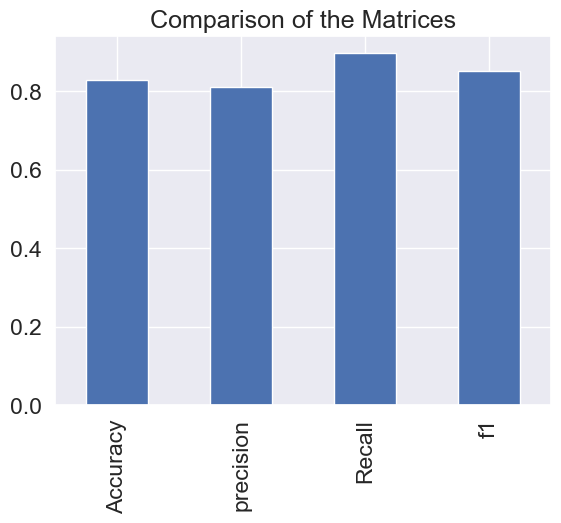

In [58]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "precision":cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
},index=[0])
cv_plot.T.plot.bar(title="Comparison of the Matrices",
                legend=False)

# Feature Improving

In [59]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
# Check coefficient
lr.fit(X_train,y_train)
lr.coef_

array([[ 0.02258519, -1.36424618,  0.79069618, -0.02407434, -0.00186723,
         0.46020094,  0.40737683,  0.03558889, -0.78274542, -0.56757494,
         0.52792825, -0.64610992, -1.10640019]])

In [61]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': np.float64(0.02258518664970554),
 'sex': np.float64(-1.3642461816765101),
 'cp': np.float64(0.7906961820556367),
 'trestbps': np.float64(-0.024074344050095283),
 'chol': np.float64(-0.0018672296463649782),
 'fbs': np.float64(0.4602009443093141),
 'restecg': np.float64(0.4073768321684957),
 'thalach': np.float64(0.035588889531912235),
 'exang': np.float64(-0.78274542034898),
 'oldpeak': np.float64(-0.5675749432335981),
 'slope': np.float64(0.5279282517877898),
 'ca': np.float64(-0.6461099217862547),
 'thal': np.float64(-1.1064001887853232)}

<Axes: title={'center': 'Features Importance'}>

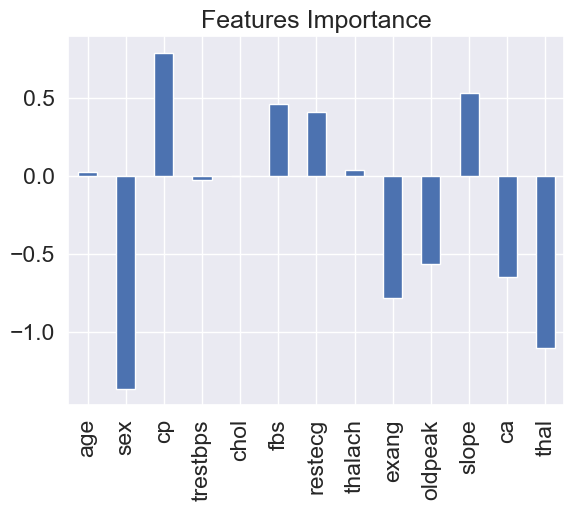

In [62]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Features Importance",legend=False)

# Conclusion 

 * we set 95% accuracy goal, but we did not meet
we can ask some question
 * what if we try to get more data
 * what if we try to improve the quality of the data
 * what if we try to use other models and see if there is any improvement
 * still we can do something its not the dead end
    